In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importing libraries  

In [ ]:
import os
import numpy as np
import pandas as pd 
from sklearn import tree
from ipykernel import kernelapp as app
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  Data Importing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML Project - Crop Prediction/AgrcultureDataset.csv",encoding = "ISO-8859-1")
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production        object
dtype: object

# Data preparation and encoding

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165


In [ ]:
df['Production']=pd.to_numeric(df['Production'],errors='coerce')

In [ ]:
data=df.groupby(['Crop_Year'])['Area','Production'].mean()
data=data.reset_index(level=0, inplace=False)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Crop_Year,Area,Production
0,1997,26038.324081,9.565489e+04
1,1998,14479.153906,5.172545e+05
2,1999,12678.074790,5.172145e+05
3,2000,12102.612169,5.496723e+05
4,2001,12371.499489,5.616144e+05
5,2002,9463.680476,4.654666e+05
6,2003,9954.769395,4.619857e+05
7,2004,11891.933465,5.909555e+05
8,2005,11822.333236,5.949085e+05
9,2006,11913.672644,6.211571e+05


In [ ]:
data['CPI']=data['Production']/data['Area']
data.head()

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,95654.894483,3.673619
1,1998,14479.153906,517254.540970,35.724086
2,1999,12678.074790,517214.531396,40.795984
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827


# discriptive analysis

In [ ]:
data.describe()

,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,1.900000e+01,19.000000
mean,2006.000000,12141.402985,5.496053e+05,48.098207
std,5.627314,3633.397954,2.364676e+05,22.993961
min,1997.000000,8187.362989,1.236197e+04,1.509884
25%,2001.500000,10531.577629,4.737958e+05,43.095905
50%,2006.000000,11768.527148,5.496723e+05,46.408482
75%,2010.500000,12237.055829,6.073395e+05,51.229452
max,2015.000000,26038.324081,1.037554e+06,95.030260


# Box plots

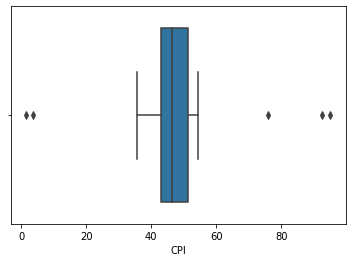

In [ ]:
import seaborn as sns
sns.boxplot(x=data['CPI'])

In [ ]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >43]
data=data[data.CPI <51]
data.set_index('Crop_Year')
data

,Crop_Year,Area,Production,CPI
3,2000,12102.612169,549672.332849,45.417661
4,2001,12371.499489,561614.446722,45.395827
5,2002,9463.680476,465466.567649,49.184519
6,2003,9954.769395,461985.734566,46.408482
7,2004,11891.933465,590955.527122,49.693814
8,2005,11822.333236,594908.463112,50.320732
10,2007,10513.848637,482125.050009,45.856191
11,2008,11768.527148,542306.282654,46.081067
12,2009,11738.077997,556438.877374,47.404599


# plotting histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa50ca07190>,
      dtype=object)

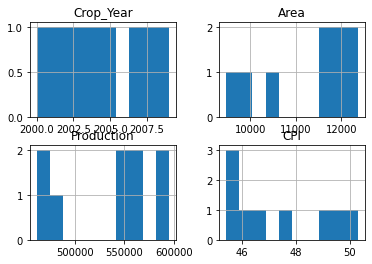

In [ ]:
data.hist()

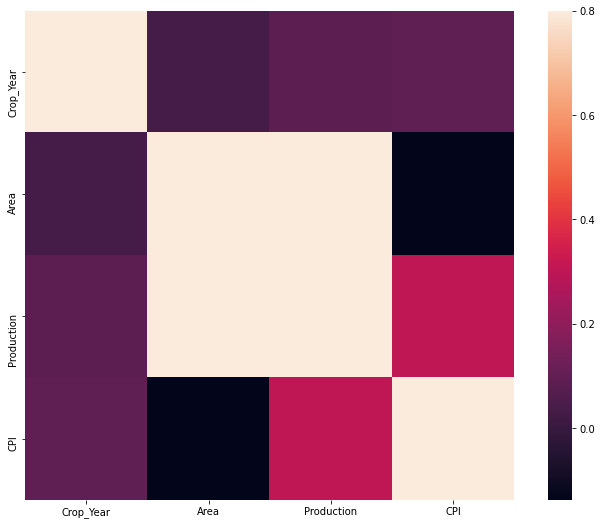

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Scatter plots 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


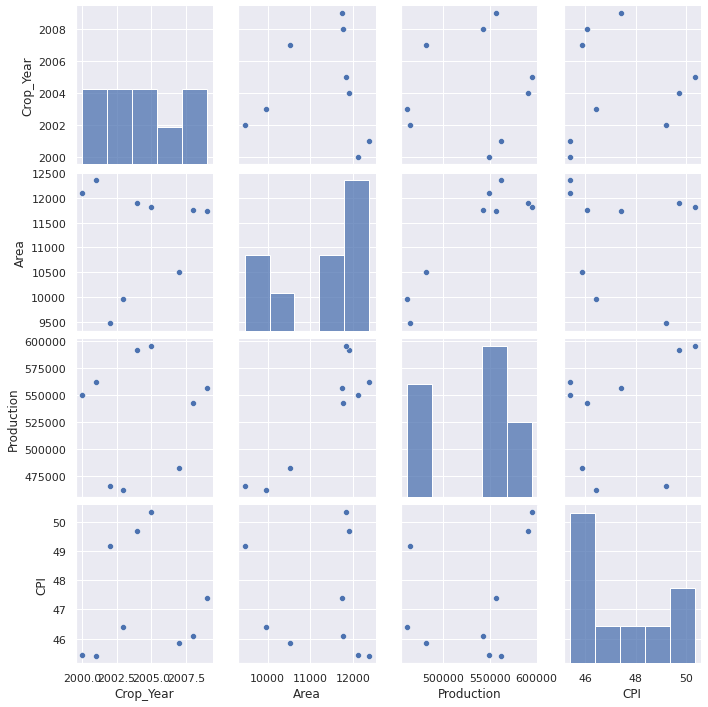

In [ ]:
sns.set()
cols = ['Crop_Year', 'Area', 'Production', 'CPI']
sns.pairplot(data[cols], size = 2.5)
plt.show();

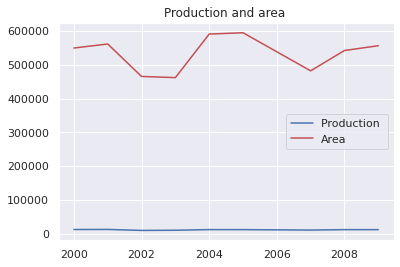

In [ ]:
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.show()

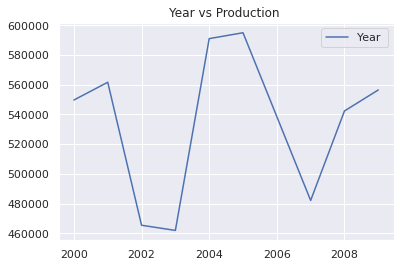

In [ ]:
x_axis=data.Crop_Year
y1_axis=data.Production
plt.plot(x_axis,y1_axis)
plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()

# Applying random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)
regressor.fit(x,y)

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=12, n_jobs=1, oob_score=False,
                      random_state=0, verbose=13, warm_start=False)

In [ ]:
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([45.726107  , 45.71519001, 48.00600917, 47.33382739, 48.92472398,
       49.51196079, 46.71271891, 46.54466636, 47.0961381 ])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

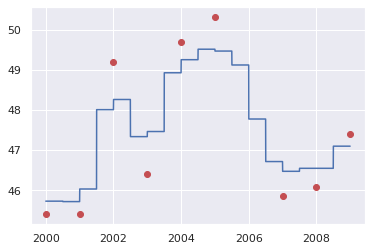

In [ ]:
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a


#  DENSITY PLOTS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


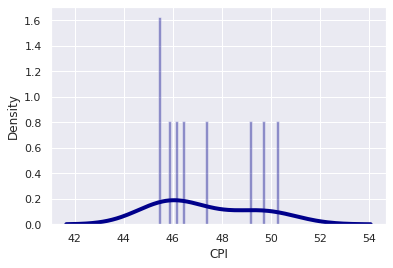

In [ ]:
sns.distplot(data['CPI'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


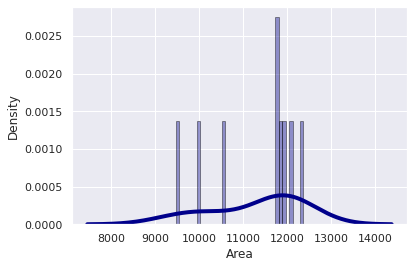

In [ ]:
sns.distplot(data['Area'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

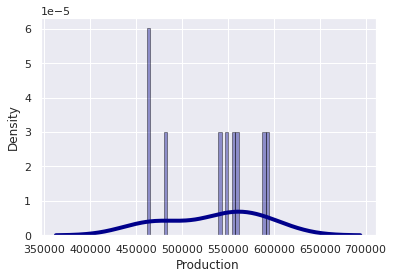

In [ ]:
sns.distplot(data['Production'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


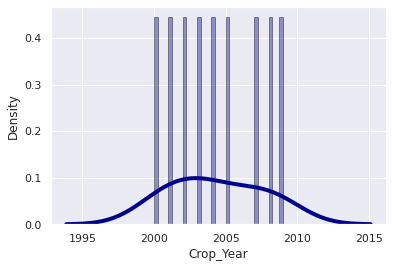

In [ ]:
sns.distplot(data['Crop_Year'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# regression model

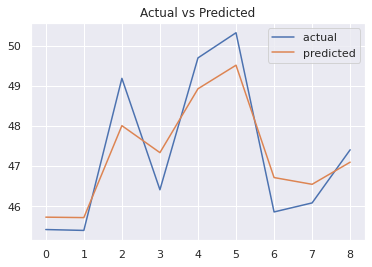

In [ ]:
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b